In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Bar Charts

In [3]:
df_used_cars = pd.read_csv("bar_chart_data.csv")

In [4]:
df_used_cars

,Brand,Cars Listings
0,Audi,419
1,BMW,636
2,Mercedes-Benz,820
3,Mitsubishi,306
4,Renault,438
5,Toyota,509
6,Volkswagen,875


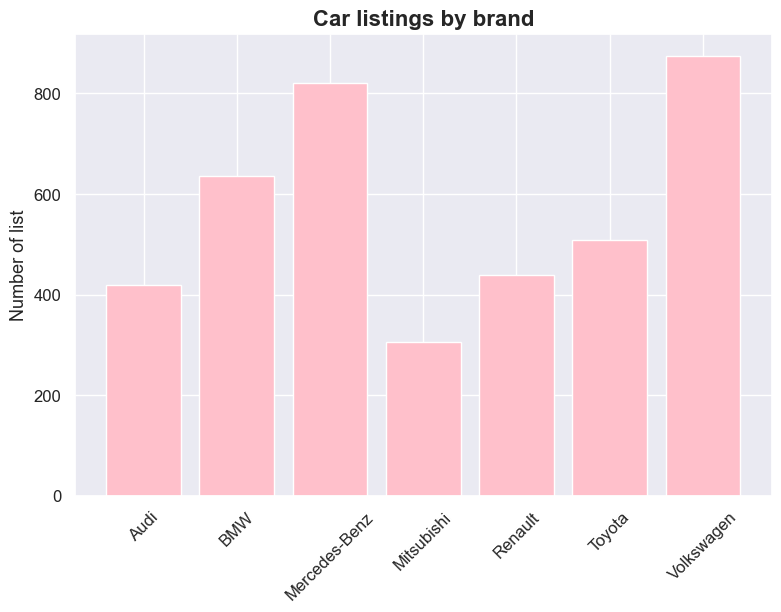

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(9,6))
plt.bar(x = df_used_cars["Brand"],
       height= df_used_cars["Cars Listings"],
       color = "pink")
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Car listings by brand", fontsize  = 16, fontweight = "bold")
plt.ylabel("Number of list", fontsize = 13)
plt.show()
# exporting image
plt.savefig("Used Cars Bar.png")

In [6]:
#Interpritation 

### Pie Chart

In [7]:
df_fuel = pd.read_csv("pie_chart_data.csv")
df_fuel

,Engine Fuel Type,Number of Cars
0,Diesel,2019
1,Gas,613
2,Other,154
3,Petrol,1559


In [8]:
sns.set_palette('colorblind')

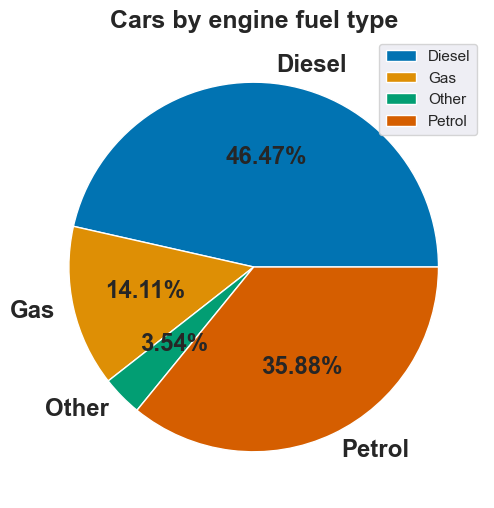

In [9]:
plt.figure(figsize=(10,6))
plt.pie(df_fuel["Number of Cars"],
       labels = df_fuel["Engine Fuel Type"].values,
       autopct= '%.2f%%',
       textprops={'size' : 'x-large',
                 'fontweight' : 'bold',
                 'rotation' : 'horizontal'})
plt.legend()
plt.title("Cars by engine fuel type", fontsize = 18, fontweight = "bold")
plt.show()

### Area Charts
- Area chart describe changes in variables over time
- Used to display quantitative data for three or more numerical variables.
- Classic, Stacked, Steam graph
- Trends and pattern

In [10]:
df_popularity = pd.read_csv("stacked_area_chart_data.csv")
df_popularity.head()

,Year,Gas,Petrol,Diesel,Other
0,1982,0,94,0,0
1,1983,0,347,0,0
2,1984,300,0,334,0
3,1985,1030,1184,984,0
4,1986,511,681,1066,340


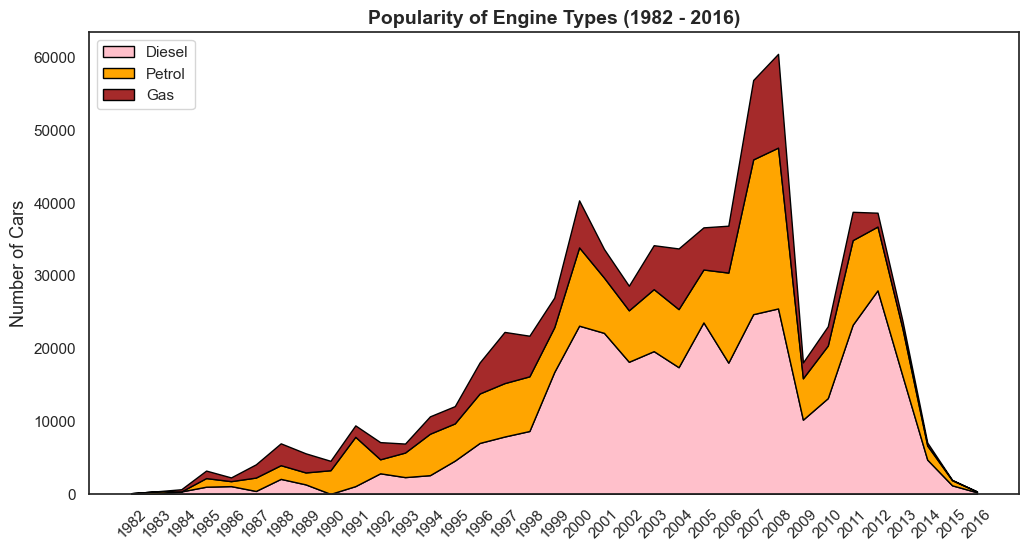

In [11]:
colors = ['pink', 'orange', 'brown']
labels = ["Diesel" , "Petrol" , "Gas"]
sns.set_style("white")
#sns.set_theme(context= "paper", style="darkgrid")
plt.figure(figsize=(12,6))
plt.stackplot(df_popularity["Year"],
             df_popularity["Diesel"],
             df_popularity["Petrol"],
             df_popularity["Gas"],
             colors = colors,
             edgecolor = 'black')
plt.xticks(df_popularity["Year"], rotation = 45)
plt.legend(labels = labels, loc = "upper left")
plt.ylabel("Number of Cars", fontsize = 13)
plt.title("Popularity of Engine Types (1982 - 2016)", fontsize = 14, weight = "bold")
#sns.despine() #to remove outline
plt.show()

#### Interpretation
- Year & Number of Cars per engine type are Ordered Variables.
- Petrol and desiel are most preffered types.
- Gas cars had their heyday during the 2007 to 2009 period.
- A very pronounced dip in the number of used cars being bought in 2008 and 2009.
- 2016 drop is because we don't have its data.

#### When is an area chart appropriate?
- When we have time data.
- When we want to compare the volume among categories.
- When we have at least three categories.
- When the variables are ordered and numerical.
- When we have no more than 6-7 categories.

#### When is an area chart not appropriate?
- When we have two many categories
- Categories having same range (Line chart is preffered)

#### Note
- The y-axis needs to start at 0

### Line Charts
- Show the evolution of one or several quantities
- Represent time series data
- focus on stock market returns

In [12]:
df_spx = pd.read_csv("line_chart_data.csv")
df_spx

,Date,GSPC500,FTSE100
0,1/3/2000,0.003264,0.000000
1,1/4/2000,-0.009549,0.000000
2,1/5/2000,-0.038345,-0.038137
3,1/6/2000,0.001922,-0.019502
4,1/7/2000,0.000956,-0.013571
...,...,...,...
2865,12/27/2010,-0.002282,0.002135
2866,12/28/2010,0.003539,0.000000
2867,12/29/2010,-0.000254,0.000000
2868,12/30/2010,0.000524,-0.002080


#### Before charting
- There is an important per-processing step we must address.
- Our date column contains values
- 'Date' is not in 'datetime' format, instead is regarded as a string
- When working with time series data it's crucial to have dates in the correct format!
- We need to convert "Date" values to "datetime" format
- Will use "to_datetime" : converts to 'datetime' format.

In [13]:
df_spx["new_date"] = pd.to_datetime(df_spx["Date"])

In [14]:
df_spx["new_date"]

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
2865   2010-12-27
2866   2010-12-28
2867   2010-12-29
2868   2010-12-30
2869   2010-12-31
Name: new_date, Length: 2870, dtype: datetime64[ns]

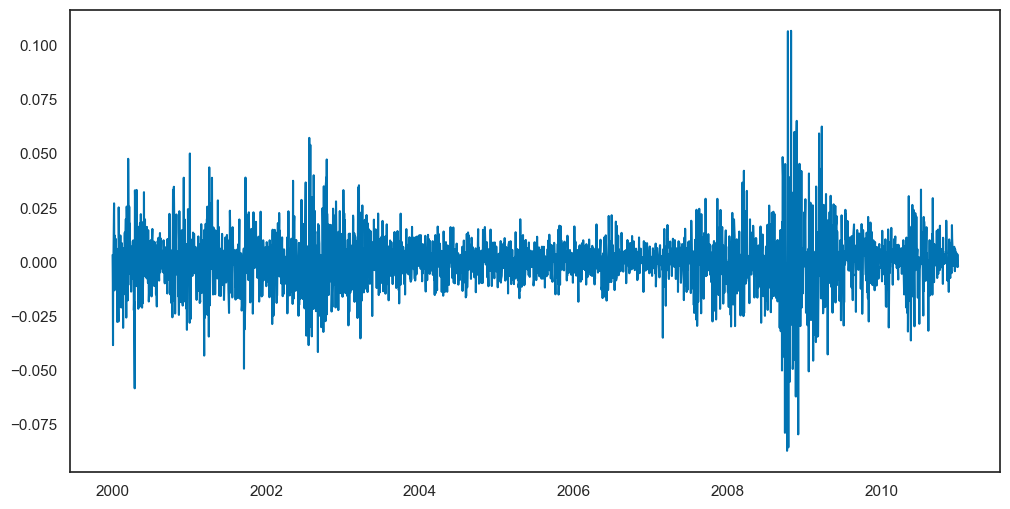

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df_spx["new_date"], df_spx["GSPC500"])     #x-axis and y-axis

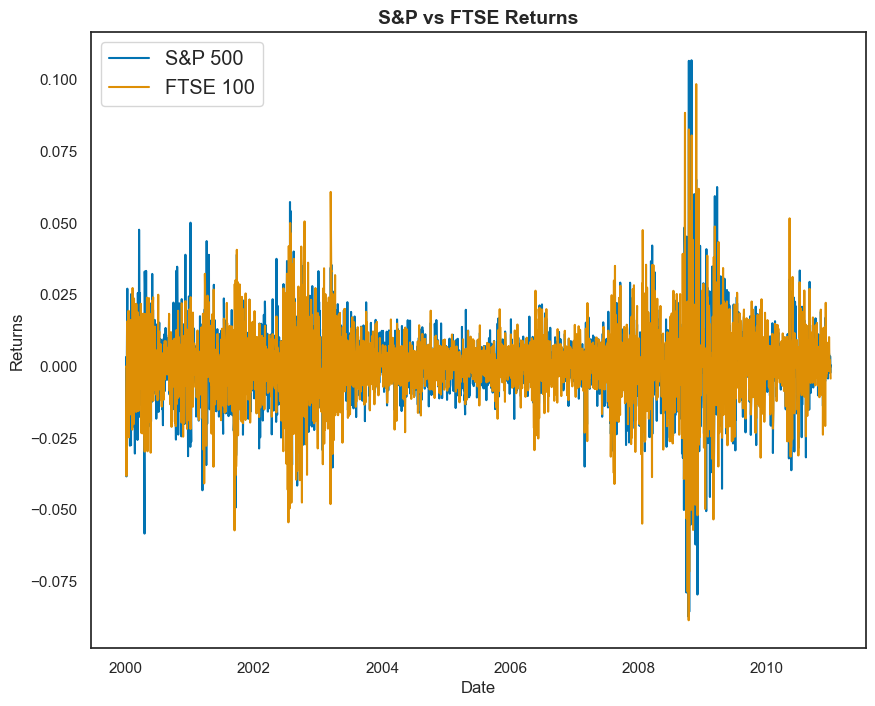

In [16]:
labels = ["S&P 500", "FTSE 100"]
sns.set_style("white")
plt.figure(figsize= (10,8))
plt.plot(df_spx["new_date"], df_spx["GSPC500"])
plt.plot(df_spx["new_date"], df_spx["FTSE100"])
plt.title("S&P vs FTSE Returns", fontsize = 14, fontweight = "bold")
plt.ylabel("Returns")
plt.xlabel("Date")
plt.legend(labels = labels, fontsize = "large")
plt.show()

In [17]:
#slicing data
df_spx_new = df_spx[(df_spx.new_date >= '2008-07-01') & (df_spx.new_date <= '2008-12-31') ] 

In [18]:
df_spx_new

,Date,GSPC500,FTSE100,new_date
2216,7/1/2008,-0.001072,0.017360,2008-07-01
2217,7/2/2008,0.007151,-0.025951,2008-07-02
2218,7/3/2008,-0.017779,-0.009781,2008-07-03
2219,7/4/2008,0.000000,0.009270,2008-07-04
2220,7/7/2008,-0.000048,-0.011650,2008-07-07
...,...,...,...,...
2343,12/25/2008,0.000000,0.000000,2008-12-25
2344,12/26/2008,0.006529,0.000000,2008-12-26
2345,12/29/2008,0.003289,0.000000,2008-12-29
2346,12/30/2008,-0.002052,0.024380,2008-12-30


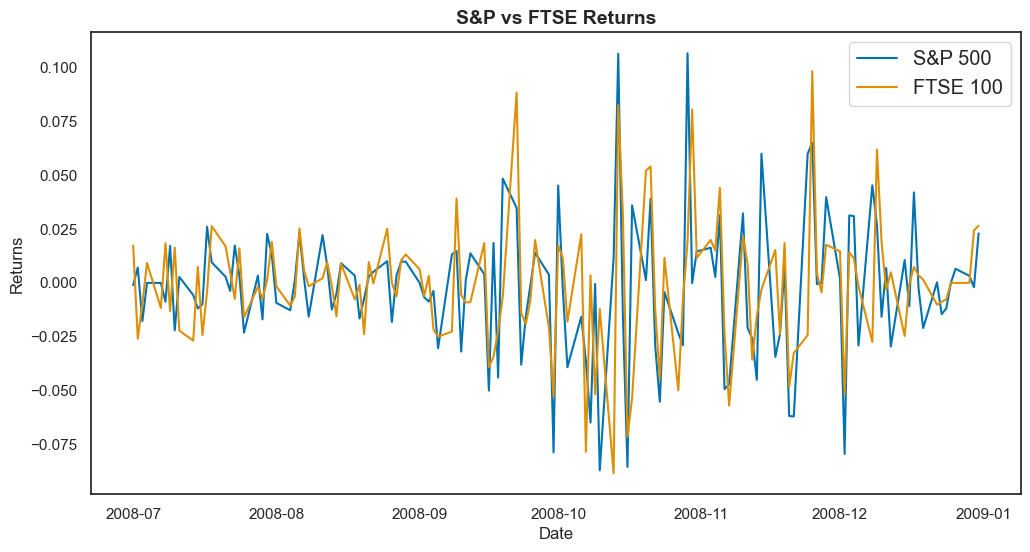

In [19]:
labels = ["S&P 500", "FTSE 100"]
sns.set_style("white")
plt.figure(figsize= (12,6))
plt.plot(df_spx_new["new_date"], df_spx_new["GSPC500"])
plt.plot(df_spx_new["new_date"], df_spx_new["FTSE100"])
plt.title("S&P vs FTSE Returns", fontsize = 14, fontweight = "bold")
plt.ylabel("Returns")
plt.xlabel("Date")
plt.legend(labels = labels, fontsize = "large")
plt.show()

#### When to use a line chart ?
- When displaying time series data, it's easy to track the progression of a variable over time
- When have several different variables.
- When we have multiple categories
#### When not to use line chart?
- When we have TOO MANY categories
#### Notes
- It's not necessary to start y-axis at 0

### Histogram
- Shows the distribution of numerical variables.
- The variable's range of values is split into intervals, -represented by different bins
- The height of the bins shows the number of observations within an interval
- Intervals

In [20]:
df_hist = pd.read_csv("histogram_data.csv")
df_hist

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price
0,1030,1,2005.0,11.0,Apartment,30,743.09,246
1,1029,1,2005.0,10.0,Apartment,29,756.21,246
2,2002,2,2007.0,7.0,Apartment,2,587.28,209
3,2031,2,2007.0,12.0,Apartment,31,1604.75,453
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467
...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1238.58,323
263,5047,5,NaN,NaN,Apartment,47,794.52,279
264,5048,5,NaN,NaN,Apartment,48,1013.27,288
265,5050,5,NaN,NaN,Apartment,50,1074.71,366


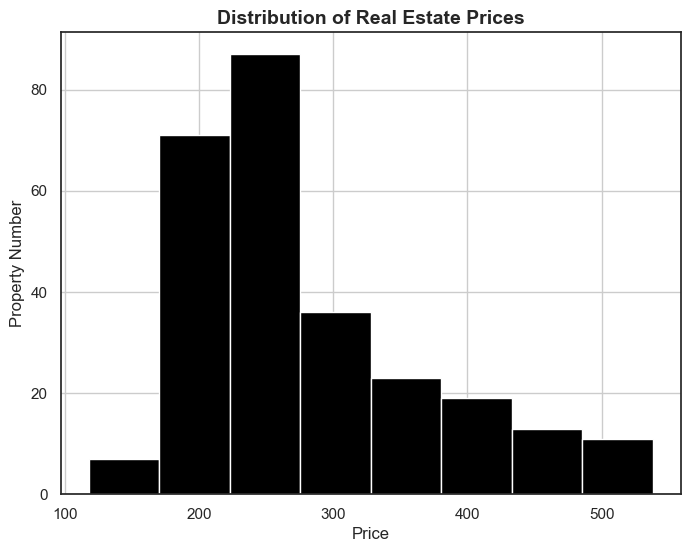

In [21]:
colors = ["black"]
sns.set_style("white")
plt.figure(figsize=(8,6))
plt.hist(df_hist["Price"],
        color = colors,
        bins = 8)
plt.xlabel('Price')
plt.ylabel('Property Number')
plt.title('Distribution of Real Estate Prices', fontsize = 14, fontweight = "bold")
plt.grid(True)

plt.show()

In [22]:
#plt.hist(k, bins=20, edgecolor='black')  # Adjust 'bins' for the number of bars
# Customize the plot
#plt.xlabel('Price')
#plt.ylabel('Property Number')
#plt.title('Histogram')
#plt.grid(True)
# Display the histogram
#plt.show()

### Scatter Plots
- A scatter plot shows the relationship between two numeric features
- Can reveal relationships like correlation within the features
- The concentration of observations and outliers in the data is easily visible
- A vital part of the exploratory data process for many statistical models

In [24]:
df_scatter = pd.read_csv("scatter_data.csv")
df_scatter.head()

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,246.17268,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,246.33190,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,209.28091,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452.66701,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467.08331,Sold


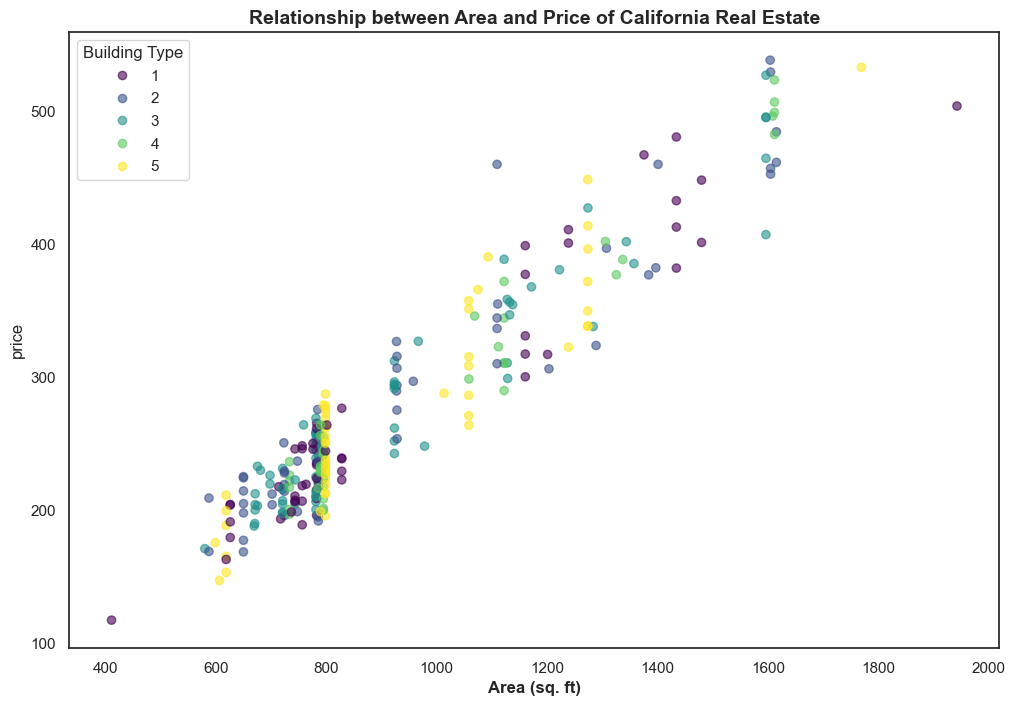

In [31]:
sns.set_style("white")
labels = ["Area", "Price"]
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_scatter["Area (ft.)"],
           df_scatter["Price"],
            alpha = 0.6,
            c = df_scatter["Building Type"],
            cmap = "viridis")
plt.legend(*scatter.legend_elements(),
           loc = "upper left",
           title = "Building Type")
plt.title("Relationship between Area and Price of California Real Estate",
         fontsize = 14,
         weight = "bold")
plt.xlabel("Area (sq. ft)", weight = "bold")
plt.ylabel("price")
plt.show()

In [38]:
#using seaborn
#plt.figure(figsize=(12,8))
#sns.scatterplot(df_scatter['Price'],
 #              df_scatter['Area (ft.)'],
  #             hue = df_scatter['Building Type'],
   #            palette = ['black', 'darkblue', 'red', 'pink', 'white'],
    #           s = 100) #s-size
#plt.show()

<Axes: xlabel='Price', ylabel='Area (ft.)'>

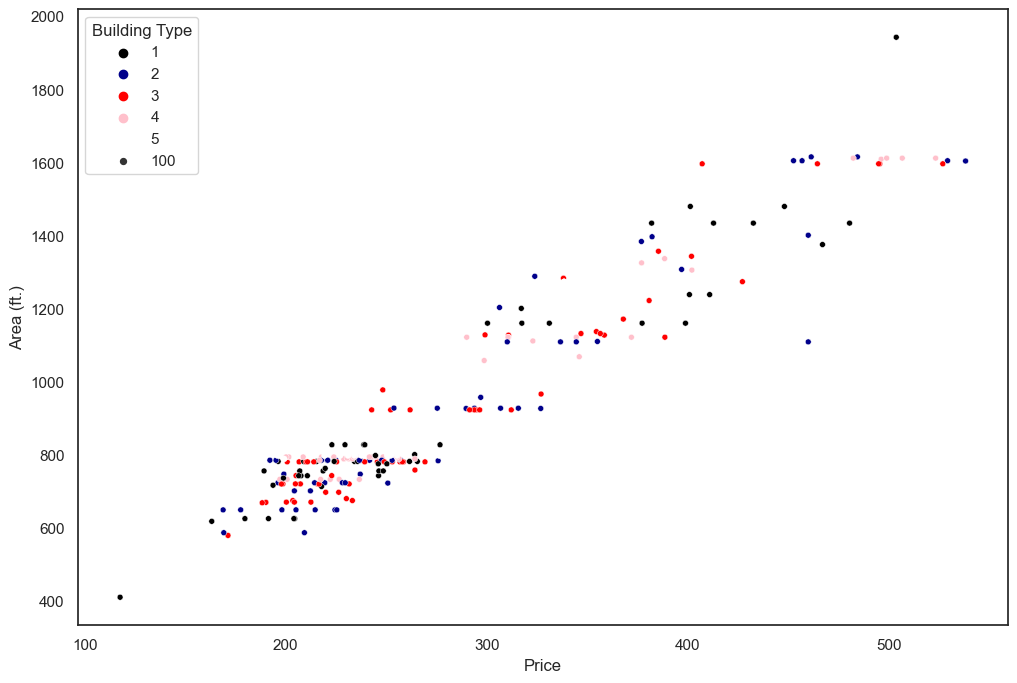

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x="Price",  # Use column names for x and y
    y="Area (ft.)",
    hue="Building Type",  # Keyword argument for hue
    palette=["black", "darkblue", "red", "pink", "white"],  # Keyword argument for palette
    size=100,  # Keyword argument for size
    data=df_scatter  # Pass the dataframe as data argument
)


### Regression Scatter

In [40]:
df_reg = pd.read_csv("scatter_plot_ii.csv")
df_reg

,Budget,Sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


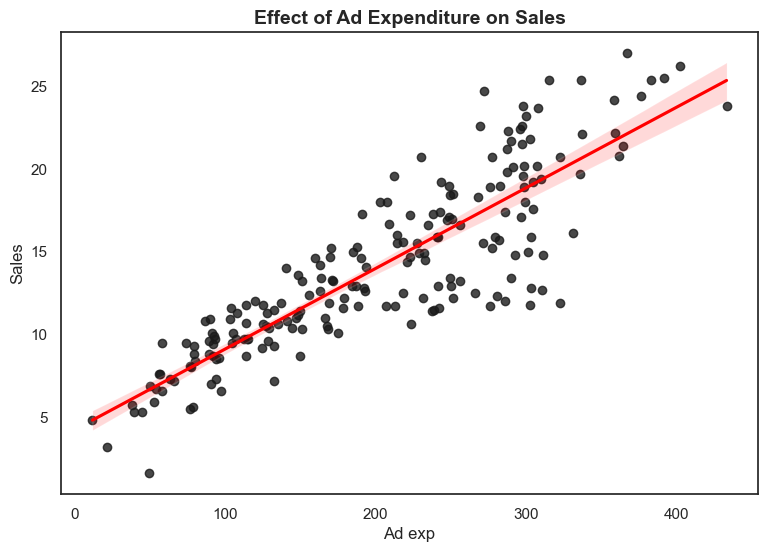

In [48]:
sns.set(rc = {'figure.figsize' : (9,6)})
sns.set_style('white')
sns.regplot(x = "Budget",
           y = "Sales",
           data = df_reg,
            scatter_kws= {'color' : 'k'},
            line_kws = { 'color' : 'red'})
          #color = "black"
plt.xlabel("Ad exp")
plt.ylabel("Sales")
plt.title("Effect of Ad Expenditure on Sales", fontsize = 14, weight = "bold")
plt.show()

- "rc" is a dictionary which allows us to override context definition dictionaries in 'Seaborn

#### sns.regplot() v/s sns.lmplot()
- sns.regplot() accepts a variety of formats for the x and y variables suc as numpy arrays, pandas series, etc.

- sns.lmplot() can only support x and y in the form of strings also known as 'long form' or 'tidy' data, supports wider range of features

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


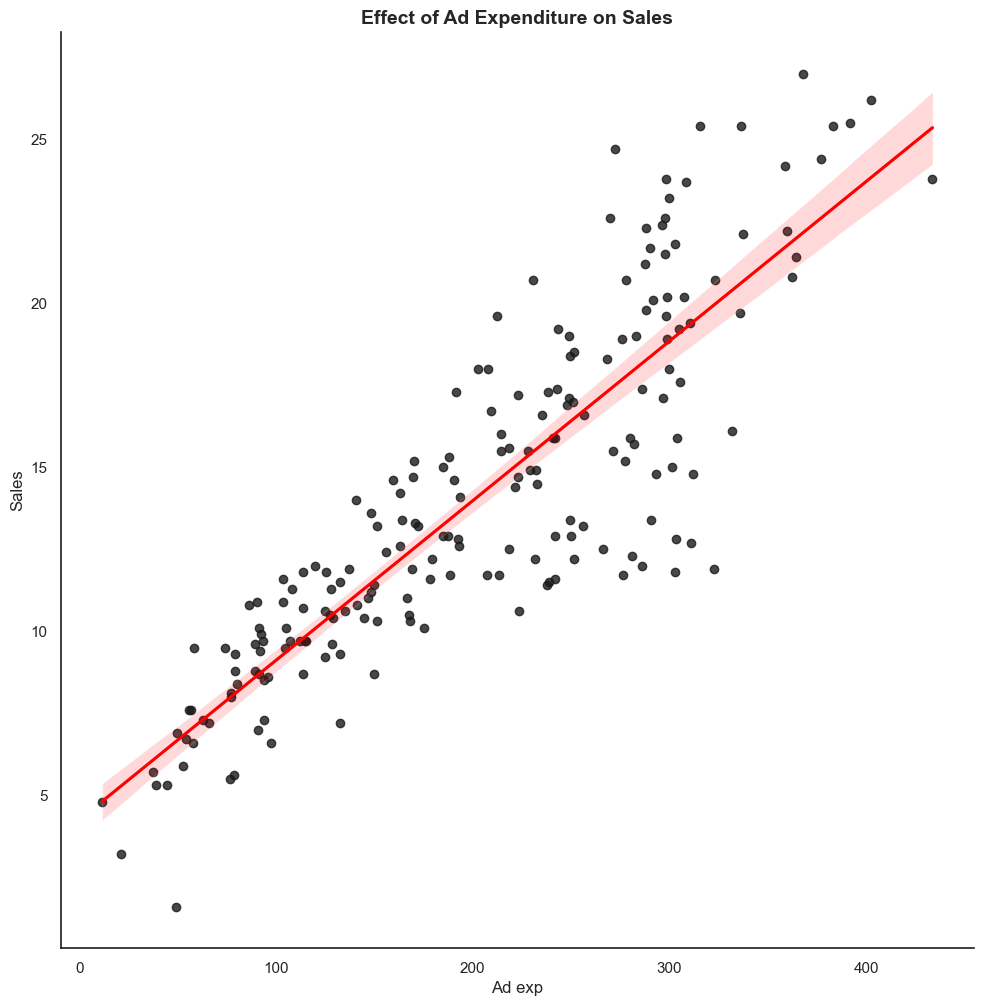

In [50]:
sns.lmplot(x = "Budget",
           y = "Sales",
           data = df_reg,
            height = 10,
            scatter_kws= {'color' : 'k'},
            line_kws = { 'color' : 'red'})
          #color = "black"
plt.xlabel("Ad exp")
plt.ylabel("Sales")
plt.title("Effect of Ad Expenditure on Sales", fontsize = 14, weight = "bold")
plt.show()

### Pareto Chart
- Combination of Line Graph and Bar Chart
- The line chart on a Pareto displays the sum of relative frequencies of the different categories, known as cumilative frequency (sums uo to 100%)
- Dual axis

- Primary axis - refers to bars and displays number of occurrences

- Secondary axis - refers to line chart and represents cumilative frequency

In [51]:
from matplotlib.ticker import PercentFormatter

In [53]:
df_bl = pd.read_csv("bar_line_chart_data.csv")
df_bl

,Year,Python Users,Participants
0,2012,0.149,798
1,2013,0.133,1880
2,2014,0.195,3285
3,2015,0.303,2800
4,2016,0.458,2895
5,2017,0.526,2900
6,2018,0.656,2300
7,2019,0.658,1800


Text(0.5, 1.0, 'KD Survey')

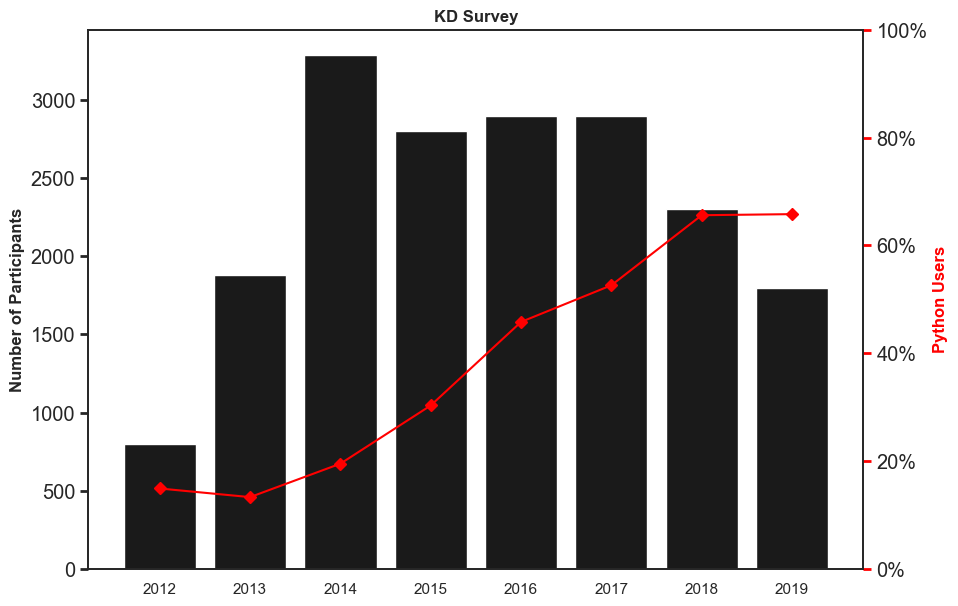

In [64]:
fig, ax = plt.subplots(figsize = (10,7))

ax.bar(df_bl["Year"],
      df_bl["Participants"],
       color = "k")
ax.set_ylabel("Number of Participants",
             weight = "bold")
ax.tick_params(axis= "y",
              width = 2,
              labelsize = "large")
ax1 = ax.twinx()
ax1.set_ylim(0,1)
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
ax1.plot(df_bl["Year"],
        df_bl["Python Users"],
        color = "red",
        marker = "D")
ax1.set_ylabel("Python Users",
              color = "red",
              weight = "bold")
ax1.tick_params(axis= "y",
               color = "red",
               width = 2,
               labelsize = "large")
ax.set_title("KD Survey", weight = "bold")

## ------------------------------------------------Thank You------------------------------------------------------------------